# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [512]:
#Import functions to be used

import requests
import requests_cache
import pandas as pd
import os
import os.path

requests_cache.install_cache()

#This method requests a search on the usda page for the values inserted
def ndb_search(food, key, verbose = False):
    
    #Add raw to the name of the food to eliminate unnecessary hits
    food=food+" raw"
    
    #Url from where we wish to download the data
    url = "https://api.nal.usda.gov/ndb/search"
    response = requests.get(url, params = {
        "q":food,
        "api_key":key,
        "format":"json",
        #We want the unbranded items
        "ds":"Standard Reference"
    })
    response.raise_for_status() # check for errors
    #if verbose:
     #   print response.url
    
    return response.json()# parse JSON



In [513]:
#input your key 
my_key="INSERT YOUR KEY HERE PLEASE"

#Test
ndb_search("watermelon",my_key,verbose=False)


{u'list': {u'ds': u'Standard Reference',
  u'end': 1,
  u'group': u'',
  u'item': [{u'ds': u'SR',
    u'group': u'Fruits and Fruit Juices',
    u'name': u'Watermelon, raw',
    u'ndbno': u'09326',
    u'offset': 0}],
  u'q': u'watermelon raw',
  u'sort': u'r',
  u'sr': u'28',
  u'start': 0,
  u'total': 1}}

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

## THE MASTER Strategy  :) 
## i did a preliminary search and several of the fruits didnt produce a ndbno, so I went to the online db and saw what was the difference between the string on the fresh.csv vs the fruit name being displayed and removed the character that was creating the discrepancy.  Most of the missing food searches were corrected, except kiwi, and another fruit. 

##  I also noted that some of the fruits were duplicated in the list but after looking closer to the fresh.csv, the form specifies what type. These cases were cabbage and cucumber. I was having multiple errors due to the request with no responses that were being an obstruction to creating the entire dataframe so I just used a try and except. 

In [514]:
#########################

#The search_fruits method takes a list of food items to be searched in the database, and returns a 
#list with all the content information for those fruits 
########################

def search_fruits(list_fruits): 
    df=[]
    for x in list_fruits: 
        if(x=="kiwi"): x= x+'fruit'
        try: 
            #since the raw and the unbranded description were included in the query we can select the first hit
            info = ndb_search(x,my_key,verbose=False)["list"]["item"][0] 
            df.append(info)
        except:
            pass
    return df

In [603]:

path="INSERT YOUR PATH HERE "
filename="fresh.csv"
filename=os.path.join(path,filename)
data=pd.read_csv(filename)


#This is to see what are the indexes for the cucumbers
foods=["cucumbers","cabbage"]
[data[(data["food"]==s)].index for s in foods] 

index=[25,26,36,37]
for i in range(len(index)):
    data.loc[index[i],"food"]=["cucumber with peel","cucumber peeled","cabbage green","cabbage red"][i]
#Remove the underscore from names and remove the duplicated 
fruits=[s.replace("_"," ") for s in data["food"]]


#Get ndbo info
ndbno_data=pd.DataFrame(search_fruits(fruits))


In [604]:
ndbno_data.head()


,ds,group,name,ndbno,offset
0,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,0
1,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0
2,SR,Fruits and Fruit Juices,"Tangerine juice, raw",09221,0
3,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,0
4,SR,Fruits and Fruit Juices,"Plums, raw",09279,0


In [605]:
#Make sure you are creating results of the same size
len(fruits)== len(ndbno_data["name"])

True

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [606]:
#The ndb_report returns the nutritional report for each ndbno or fruit and follows the parameter criteria 
#shown in the V2 documentation. 

def ndb_report(ndb_number,my_key):
    
    url2 = "https://api.nal.usda.gov/ndb/V2/reports"
    response = requests.get(url2, params = {
        "api_key":my_key,
        "format":"json",
        "ndbno":ndb_number
    })
    return response.json()    
    

In [607]:
#Test Run t
t=ndb_report("09279",my_key)["foods"][0]["food"]["nutrients"]

In [608]:
#Find energy in test run
t=pd.DataFrame(t); t[t["name"]=="Energy"] 

,group,measures,name,nutrient_id,unit,value
1,Proximates,"[{u'eunit': u'g', u'eqv': 165.0, u'qty': 1.0, ...",Energy,208,kcal,46


#### Replicate for all ndbno numbers 

In [609]:
#Info of nutrients interest in measures: eqv and measures:label "cup,sliced" or "fruit"
#group:"Vitamins value to eqv

#Here the get_nutrient method gets the information for the nutrient of interest 


def get_Energy(list_in):
    
    #Enery is the slot [1]
    conc=pd.DataFrame([ndb_report(j, my_key)["foods"][0]["food"]["nutrients"][1] for j in list_in])
    return conc


In [610]:
#Get nutrient data for all ndbo and add Fruit_name column to know from which fruit it came from 
nutrient_data=get_Energy(ndbno_data["ndbno"]); nutrient_data["Fruit_name"]=fruits; 

In [611]:
nutrient_data.head()

#If i get enough time then convert measure to eqv

,group,measures,name,nutrient_id,unit,value,Fruit_name
0,Proximates,"[{u'eunit': u'g', u'eqv': 154.0, u'qty': 1.0, ...",Energy,208,kcal,30,watermelon
1,Proximates,"[{u'eunit': u'g', u'eqv': 177.0, u'qty': 1.0, ...",Energy,208,kcal,34,cantaloupe
2,Proximates,"[{u'eunit': u'g', u'eqv': 247.0, u'qty': 1.0, ...",Energy,208,kcal,43,tangerines
3,Proximates,"[{u'eunit': u'g', u'eqv': 152.0, u'qty': 1.0, ...",Energy,208,kcal,32,strawberries
4,Proximates,"[{u'eunit': u'g', u'eqv': 165.0, u'qty': 1.0, ...",Energy,208,kcal,46,plums


__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [612]:
data["Energy_value"]=nutrient_data['value'].astype(int)

In [613]:
data.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,Energy_value
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,30
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,34
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,43
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,32
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,46


In [614]:
data.dtypes

form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
food              object
type              object
Energy_value       int64
dtype: object

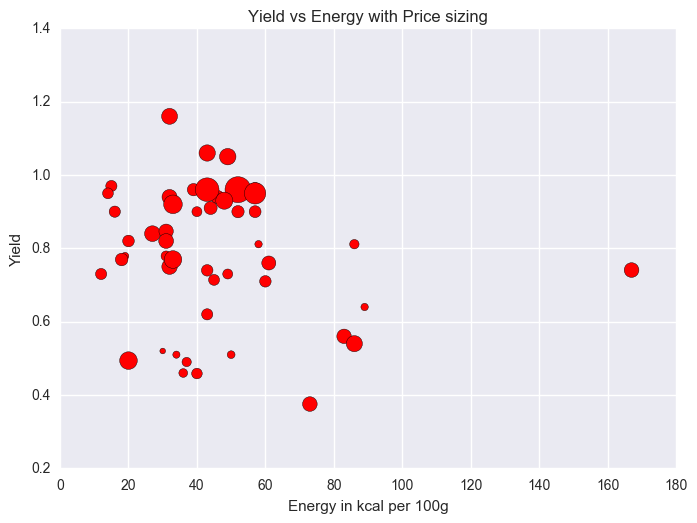

In [615]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(7,5))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes([0.1,0.1,0.88,0.88])

ax.scatter(data["Energy_value"], data["yield"], s=data["price_per_lb"]*50, c='r', marker='o')

ax.set_xlabel('Energy in kcal per 100g')
ax.set_ylabel('Yield')
ax.set_title("Yield vs Energy with Price sizing")
#ax.set_zlabel('Energy kcal per 100g')

plt.show()


#### In this 2d scatterplot the sizes are determined by the  that the food provides. Acording to this we would want a food that gives us high energy, less price per pound and high yield. We are looking at values in the high right corner with small size. 

### only a medium-price food is located in the extreme axis of the df with an approximate 0.8 yield this food is AVOCADO, next one is a small point located in yield > 0.8 and energy> 80 with a small cost this is the SWEET POTATOE. 


In [542]:
data[data["Energy_value"]> 160]

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,Energy_value
42,Fresh1,2.235874,0.740753,0.31967,0.964886,avocados,vegetables,167


In [547]:
data[(data["Energy_value"] > 80) & (data["yield"]>0.8)]

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,Energy_value
38,Fresh1,0.918897,0.811301,0.440925,0.4994,sweet_potatoes,vegetables,86


## Nevertheless the energy value alone does not say much if it is not proportional to the eqv (proportion of eatable food per 100g) so given that I had more time I would had attempt to do this conversion and re-plot. 